In [87]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [88]:
# problem 1
f1 = lambda x: 1/(x+5)

In [89]:
def simpson(f, a, b, panel):
    x = np.linspace(a,b,panel+1)
    h = x[1] - x[0]
    w = np.ones(panel+1)
    for i in range(panel+1):
        if i % 2 == 0:
            w[i] = 2.0
        else:
            w[i] = 4.0
    w[0] = 1.0
    w[-1] = 1.0
    area = h/3 * np.sum(w * f(x))
    return area

In [90]:
# 1a
resultSimpson = simpson(f1,1,5,10)
print(f"1a) The result of Simpson's 1/3 rule is: {resultSimpson}")

# 1b
# integrate the function with a lower bound of 1 and an upper bound of 5
# the integral of the function would be: ln(|x+5|) + C
# definite integral will be:
exactSimpson = np.log(10) - np.log(6)
print(f"1b) The exact solution is: {exactSimpson}")

# 1c
errSimpson = np.abs((resultSimpson - exactSimpson) / exactSimpson) * 100
print(f"1c) The relative error for the simpson 1/3 rule is: {errSimpson}%")

1a) The result of Simpson's 1/3 rule is: 0.5108261903564096
1b) The exact solution is: 0.5108256237659909
1c) The relative error for the simpson 1/3 rule is: 0.00011091660095600698%


In [91]:
# problem 2
f2 = lambda x, y: y*x**3 - 1.5*y
x2 = np.arange(0,2.1,0.1)
y0 = 1
# stepsize of 0.1

In [92]:
def rk5(f, x, y0):
    n = np.shape(x)[0]
    y = np.zeros(n)
    h = x[1] - x[0]
    y[0] = y0
    for i in range(n-1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + (1 / 4 * h), y[i] + (1 / 4 * k1 * h))
        k3 = f(x[i] + (1 / 4 * h), y[i] + (1 / 8 * k1 * h) + (1 / 8 * k2 * h))
        k4 = f(x[i] + (1 / 2 * h), y[i] - (1 / 2 * k2 * h) + (k3 * h))
        k5 = f(x[i] + (3 / 4 * h), y[i] + (3 / 16 * k1 * h) + (9 / 16 * k4 * h))
        k6 = f(x[i] + h, y[i] - (3 / 7 * k1 * h) + (2 / 7 * k2 * h) + (12 / 7 * k3 * h) - (12 / 7 * k4 * h) + (8 / 7 * k5 * h))
        y[i+1] = y[i] + 1 / 90 * h * (7 * k1 + 32 * k3 + 12 * k4 + 32 * k5 + 7 * k6)
    return y

2c) The relative error for the 5th-order Runge-Kutta method is: 0.0009279114562533234%


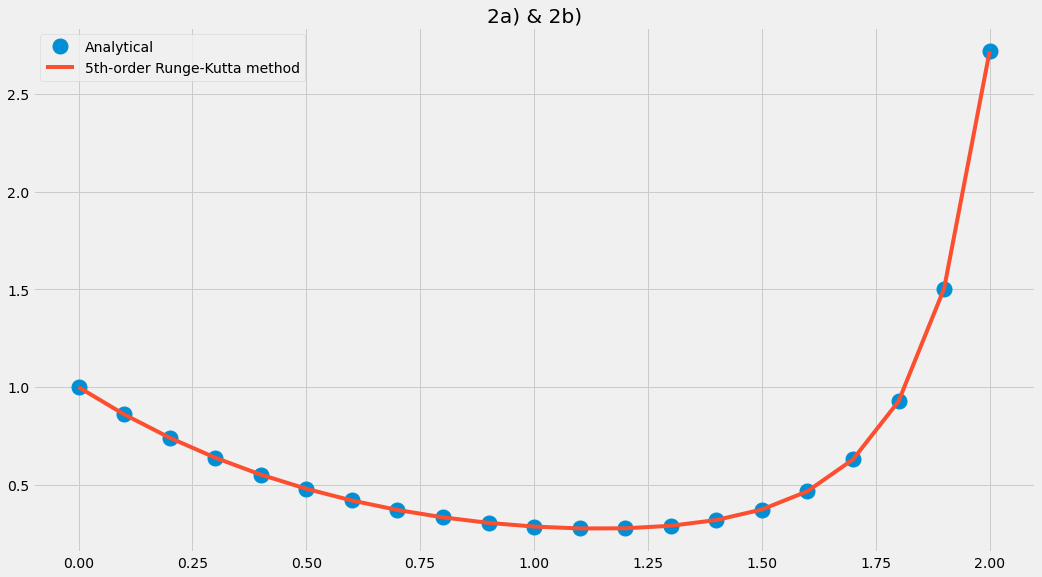

In [93]:
fig = plt.figure(1, figsize = (16,9)); plt.clf(); ax = fig.add_subplot(111)
# 2a
# integrate using separation of variables
# C is acquired by subbing in y(0) = 1, C = 0
exactRungeKutta = lambda x: np.exp(0.25*x**4 - 1.5*x)
ax.plot(x2, exactRungeKutta(x2), 'o', label = "Analytical", markersize = 15)

# 2b
rungeKutta = rk5(f2, x2, y0)
ax.plot(x2, rungeKutta, label = "5th-order Runge-Kutta method")
ax.set_title("2a) & 2b)")
ax.legend()

# 2c
errRungeKutta = np.abs((np.linalg.norm(rungeKutta - exactRungeKutta(x2)))) / np.linalg.norm(exactRungeKutta(x2)) * 100
print(f"2c) The relative error for the 5th-order Runge-Kutta method is: {errRungeKutta}%")

In [94]:
# problem 3
f3 = lambda x: 2 * np.sin(x) - (x**2 / 10)
df = lambda f, x, h: (f(x+h)-f(x-h)) / (2*h) # First order differentiation
df3 = lambda x: 2 * np.cos(x) - (x / 5)
x3 = np.linspace(0, 5, 100)
xStarting = [0,1,4]
h = 1.0E-6

In [95]:
def parabolic(f, x):
    h = 1.0E-6
    while True:
        n1 = f(x[0])*(x[1]**2 - x[2]**2)
        n2 = f(x[1])*(x[2]**2 - x[0]**2)
        n3 = f(x[2])*(x[0]**2 - x[1]**2)
        
        d1 = 2*f(x[0])*(x[1]-x[2])
        d2 = 2*f(x[1])*(x[2]-x[0])
        d3 = 2*f(x[2])*(x[0]-x[1])
        
        x3 = (n1+n2+n3)/(d1+d2+d3) 

        # If less than margin that we have set (close to 0)
        if np.abs(df(f, x3, h)) < 1.0E-5:
            xOpt = x3
            break
        
        # Substituting values to find new x3 in next iteration
        x[0] = x[1]
        x[1] = x[2]
        x[2] = x3
    return xOpt

3a) The optimum-point value is: 1.427551829630885, while the value of the function is: 1.7757256531474122
3b) The value of the objective-function gradient at the optimum point is: -1.1086389806180819e-07


Text(0.5, 1.0, '3c)')

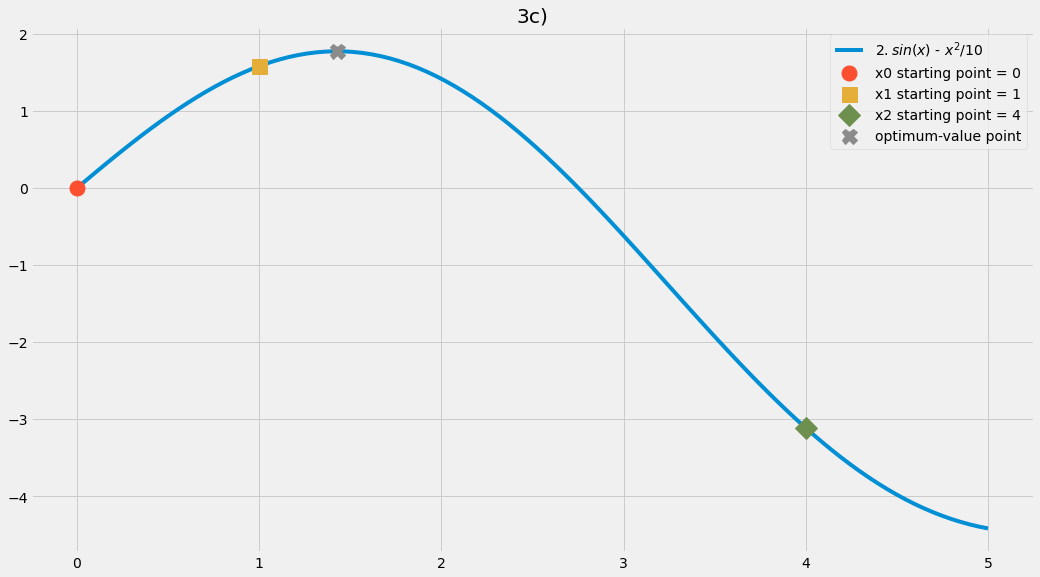

In [96]:
# 3a
optimumValue = parabolic(f3, xStarting)
print(f"3a) The optimum-point value is: {optimumValue}, while the value of the function is: {f3(optimumValue)}")

# 3b
optimumGradient = df3(optimumValue)
print(f"3b) The value of the objective-function gradient at the optimum point is: {optimumGradient}")

# 3c
fig = plt.figure(2, figsize = (16, 9)); plt.clf(); ax2 = fig.add_subplot(111)
ax2.plot(x3, f3(x3), label = "$2.sin(x)$ - $x^2$/10")
ax2.plot(0, f3(0), "o", markersize = 15, label = "x0 starting point = 0")
ax2.plot(1, f3(1), "s", markersize = 15, label = "x1 starting point = 1")
ax2.plot(4, f3(4), "D", markersize = 15, label = "x2 starting point = 4")
ax2.plot(optimumValue, f3(optimumValue), "X", markersize = 15, label = "optimum-value point")
ax2.legend()
ax2.set_title("3c)")

In [97]:
# problem 4
f4 = lambda x: -x[0] + x[1] - 2*x[0]**2 - 2*x[0]*x[1] - x[1]**2
df4 = lambda x: np.array([-1 - 4*x[0] - 2*x[1], 1 - 2*x[0] - 2*x[1]])
# Hessian matrix, second derivative of the function
H = lambda x: np.array([[-4, -2], [-2, -2]])
z = [2,3]

In [98]:
def steepest(f, g, x0):
    x = x0
    alpha = 0.01
    while 1:
        # plus sign because ascent
        x = x + alpha * g(x)
        if np.linalg.norm(g(x)) < 1.0E-6: break
    return x

In [99]:
def newton(f, g, H, x0):
    x = x0
    while 1:
        # x = x - inv(H(x)).dot(g(x)) # slower
        x = x - np.linalg.solve(H(x), g(x)) # faster
        if np.linalg.norm(g(x)) < 1.0E-6: break
    return x

In [100]:
# 4a
optimumSteepest = steepest(f4, df4, z)
print(f"4a) The optimum point obtained by steepest-ascent is: {optimumSteepest}")

# 4b
optimumNewton = newton(f4, df4, H, z)
print(f"4b) The optimum point obtained by Newton's algorithm is: {optimumNewton}")

4a) The optimum point obtained by steepest-ascent is: [-0.99999931  1.49999889]
4b) The optimum point obtained by Newton's algorithm is: [-1.   1.5]
